<a href="https://colab.research.google.com/github/Kamruzzaman2200/Datamining/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [6]:
# 📌 Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


#Load dataset

In [7]:

df = pd.read_csv("/content/drive/MyDrive/DataSets/AirQualityUCI.csv", sep=';', decimal=',', low_memory=False)

df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


#Handle missing/null values (REPLACE with mean)

In [9]:
df.replace(-200, np.nan, inplace=True)

# Drop fully empty columns
df.dropna(axis=1, how='all', inplace=True)

# Calculate the mean of only the numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check missing values (should be all 0 now for numeric columns)
df[numeric_cols].isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


#Select numeric columns only for correlation

In [10]:

numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
df.shape

(9471, 15)

#Custom color palette function

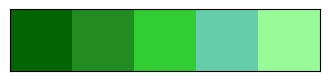

In [12]:

def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors), size=0.8)
    plt.tick_params(axis='both', labelsize=0, length=0)
    return customPalette

pal = ['#006400', '#228B22', '#32CD32', '#66CDAA', '#98FB98']
custom_palette(pal)


#Correlation heatmap

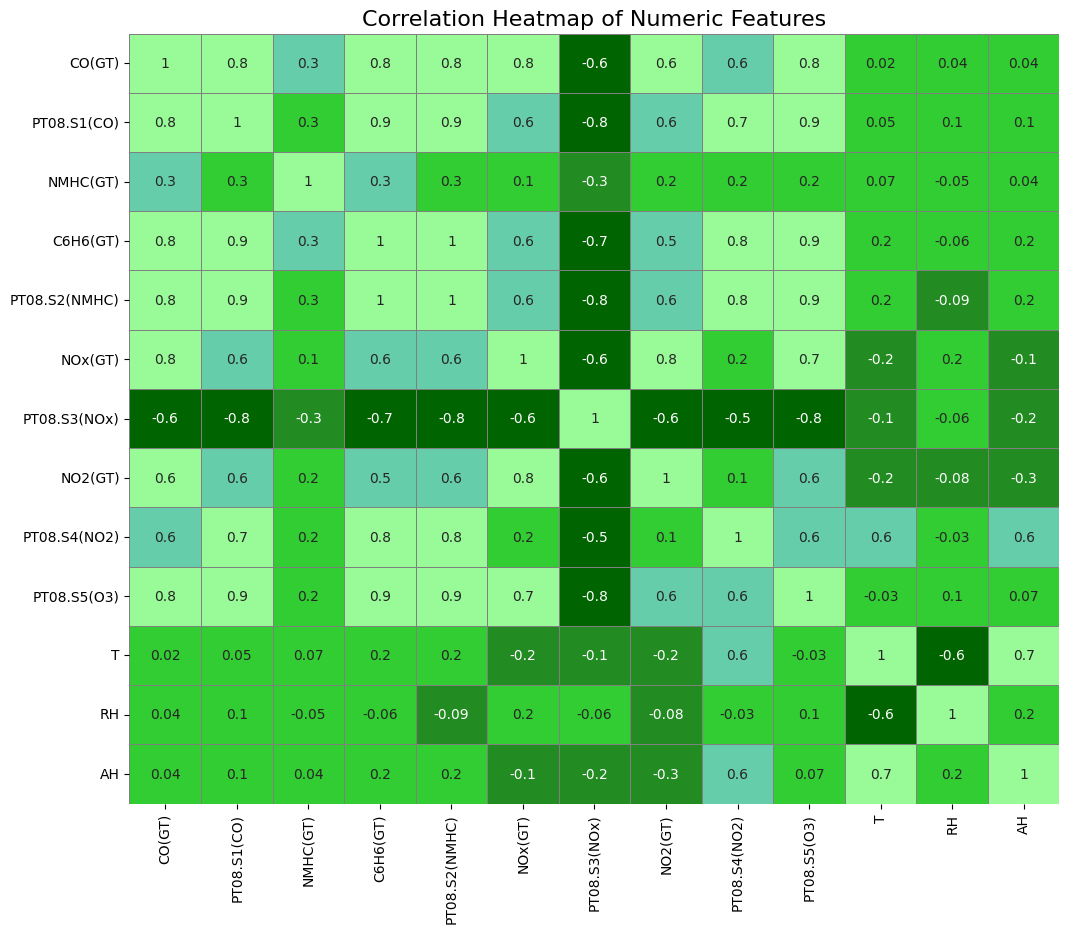

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='0.1g', cmap=pal,
            cbar=False, linewidths=0.5, linecolor='grey', ax=ax)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


#Define features and target

In [14]:

X = numeric_df.drop(columns=['AH'])
y = numeric_df['AH']


#Train-test split

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Linear Regression

In [16]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))


Linear Regression R²: 0.9015481470143037
Linear Regression MSE: 0.01498006952082906


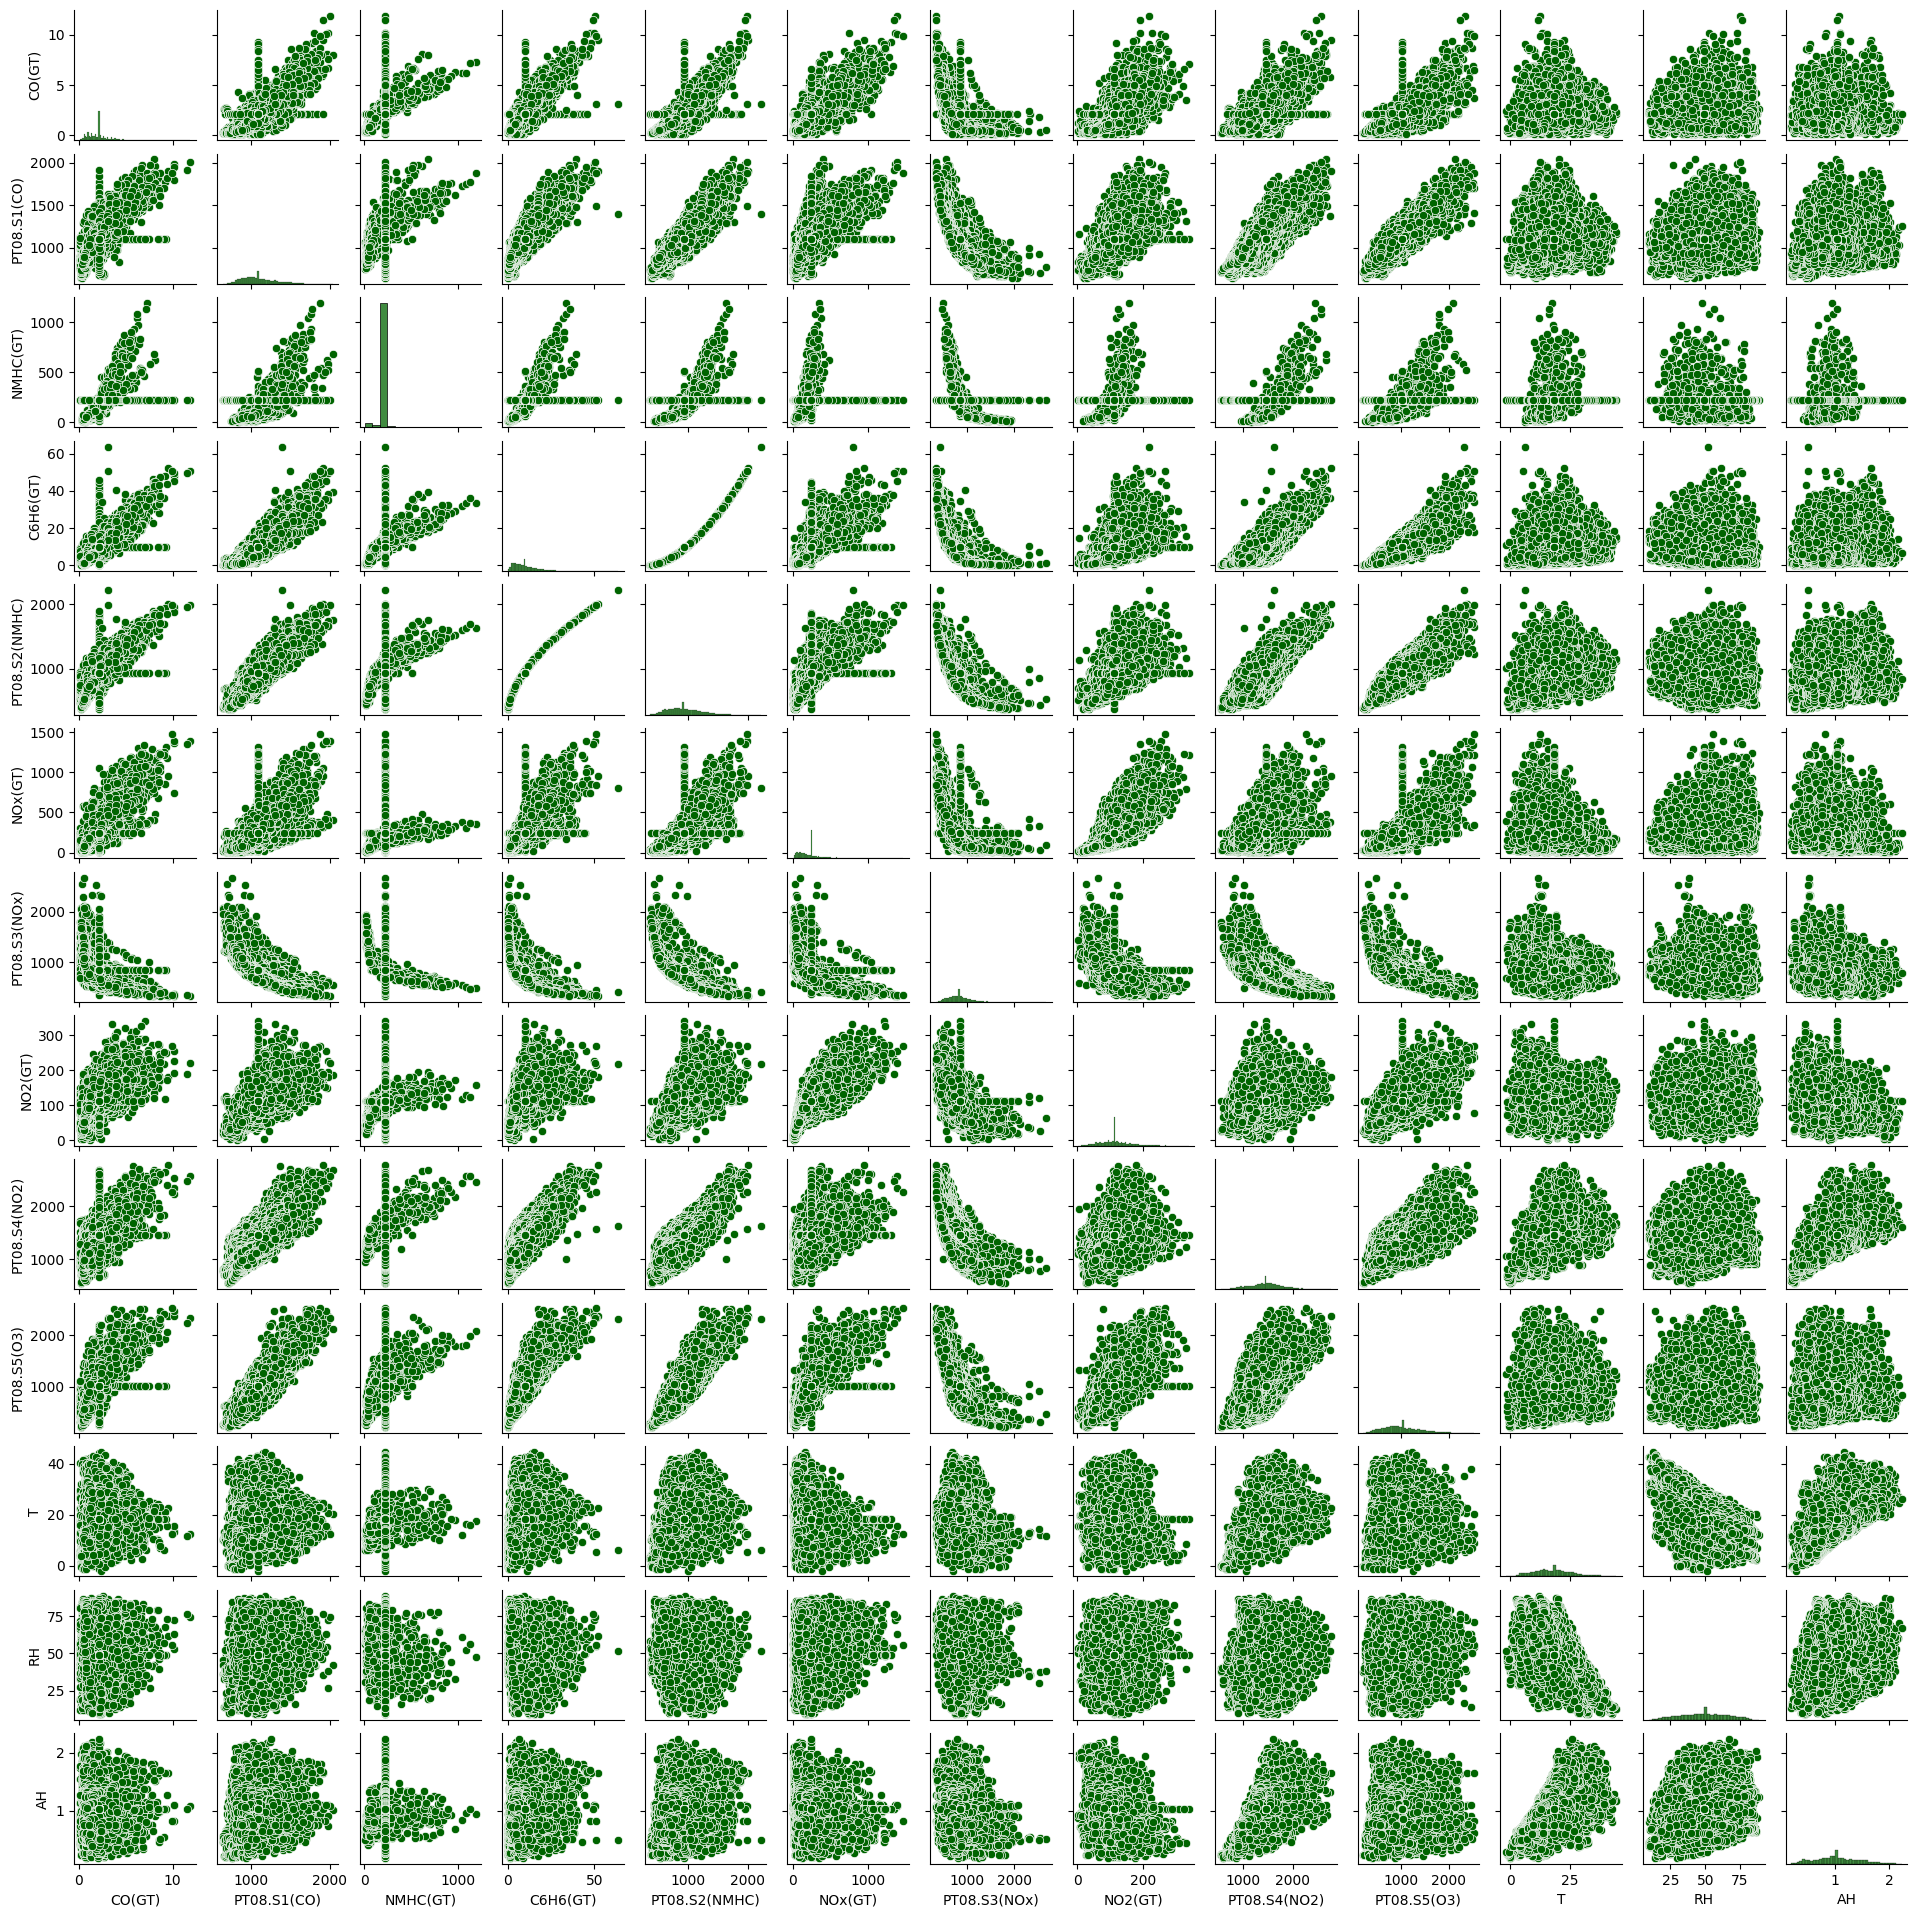

In [22]:
sns.pairplot(df, height=1.5);
plt.show()

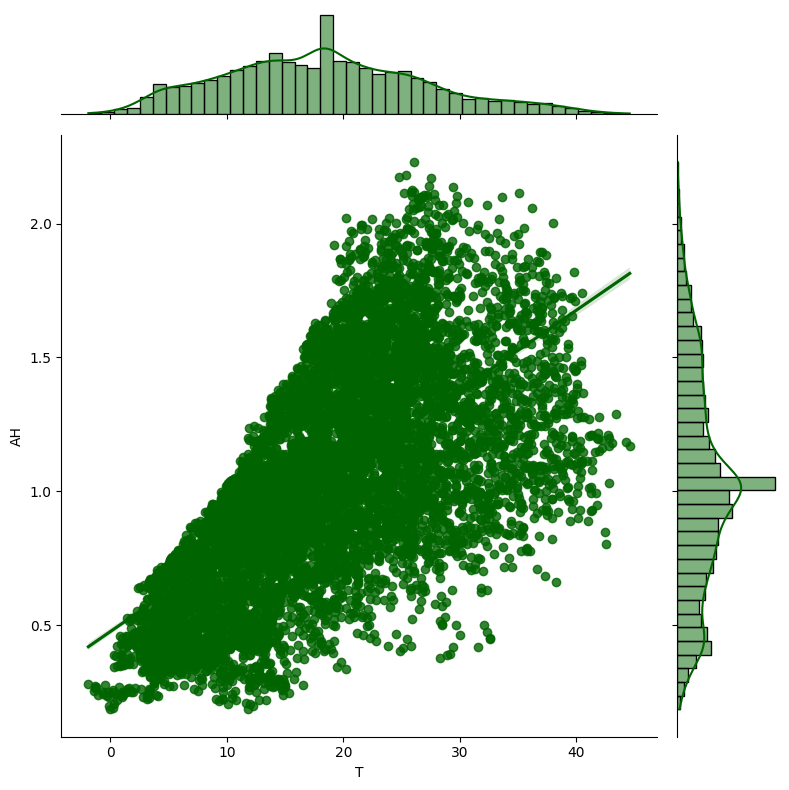

In [24]:
sns.jointplot(x='T', y='AH', data=df, kind='reg', height=8);
plt.show();

#Plot Linear Regression predictions

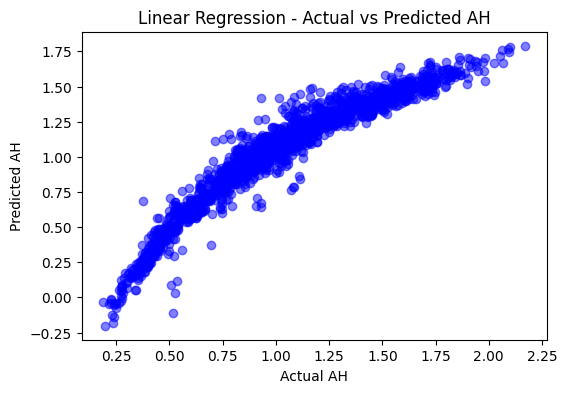

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.xlabel("Actual AH")
plt.ylabel("Predicted AH")
plt.title("Linear Regression - Actual vs Predicted AH")
plt.show()


#Polynomial Regression

In [18]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_pred_poly = poly_reg.predict(X_poly_test)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression R²: 0.993983938182994
Polynomial Regression MSE: 0.000915381697015382


#Plot Polynomial Regression predictions

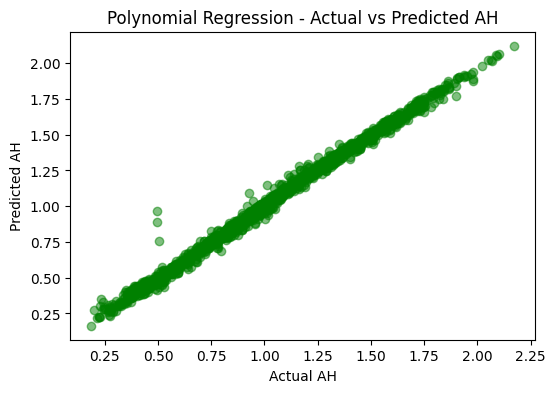

In [19]:

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='green')
plt.xlabel("Actual AH")
plt.ylabel("Predicted AH")
plt.title("Polynomial Regression - Actual vs Predicted AH")
plt.show()


#Compare results

In [20]:
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))


Linear Regression R²: 0.9015481470143037
Polynomial Regression R²: 0.993983938182994
Linear Regression MSE: 0.01498006952082906
Polynomial Regression MSE: 0.000915381697015382
